# Predicting Onset/Diagnosis of Chronic Conditions, Diabetes

- toc: true 
- badges: true
- comments: true
- sticky_rank: 1
- categories: [Big Data , h2o]

# National Institute of Diabetes and Digestive and Kidney Diseases, https://www.niddk.nih.gov/


![h2o.ai](https://avatars0.githubusercontent.com/u/1402695?s=200&v=4)


Credit: code from https://www.kaggle.com/sudalairajkumar/getting-started-with-h2o

In [20]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

In [21]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_6cf4p5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [22]:
diabetes_df = h2o.import_file("https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/diabetes.csv", destination_frame="diabetes_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/diabetes.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
diabetes_df.describe()

Rows:768
Cols:9




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


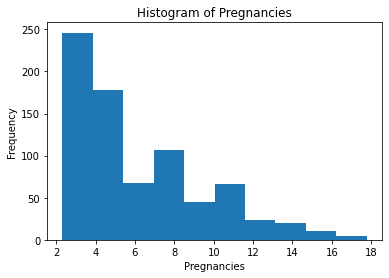

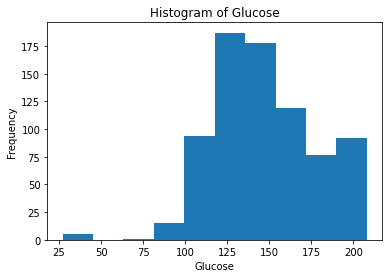

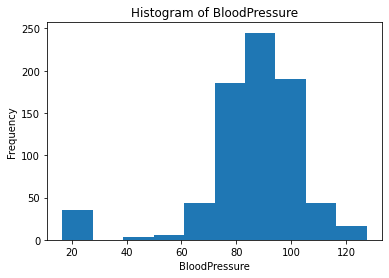

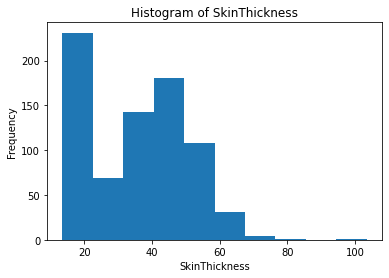

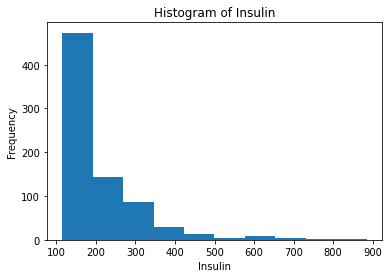

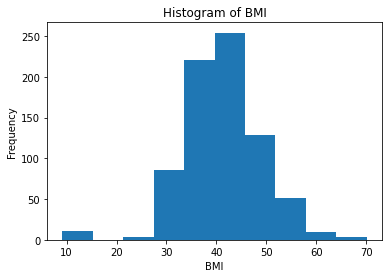

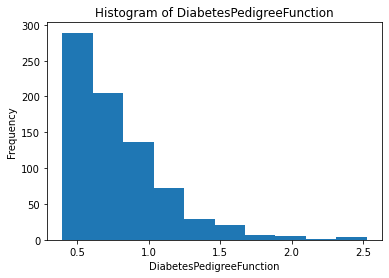

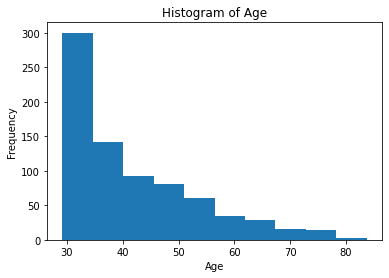

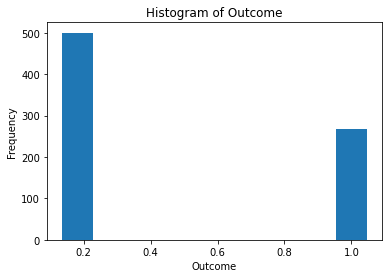

In [25]:
for col in diabetes_df.columns:
    diabetes_df[col].hist()

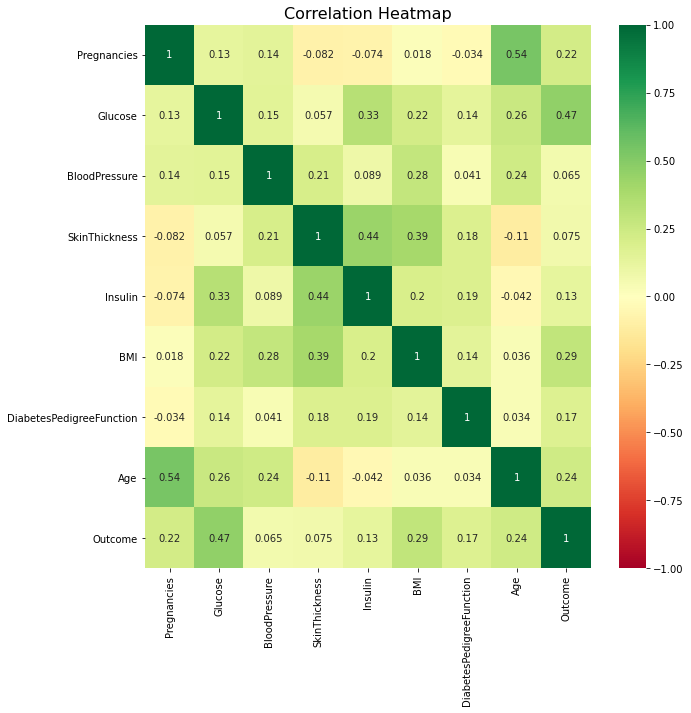

In [26]:
plt.figure(figsize=(10,10))
corr = diabetes_df.cor().as_data_frame()
corr.index = diabetes_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [27]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [28]:
predictors = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1604778858031_53


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11552.0,5.0,5.0,5.0,6.0,23.0,13.68




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
AUCPR: 0.9845164166436653
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,,0,1,Error,Rate
0,0,290.0,9.0,0.0301,(9.0/299.0)
1,1,14.0,152.0,0.0843,(14.0/166.0)
2,Total,304.0,161.0,0.0495,(23.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462205,0.929664,150.0
1,max f2,0.323826,0.944836,176.0
2,max f0point5,0.548022,0.967302,132.0
3,max accuracy,0.506976,0.950538,142.0
4,max precision,0.983850,1.000000,0.0
5,max recall,0.173383,1.000000,227.0
6,max specificity,0.983850,1.000000,0.0
7,max absolute_mcc,0.506976,0.892066,142.0
8,max min_per_class_accuracy,0.372134,0.939799,163.0
9,max mean_per_class_accuracy,0.370458,0.945803,164.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.964760,2.801205,2.801205,1.000000,0.970134,1.000000,0.970134,0.030120,0.030120,180.120482,180.120482,0.030120
1,2,0.021505,0.959842,2.801205,2.801205,1.000000,0.963441,1.000000,0.966788,0.030120,0.060241,180.120482,180.120482,0.060241
2,3,0.030108,0.948198,2.801205,2.801205,1.000000,0.952824,1.000000,0.962798,0.024096,0.084337,180.120482,180.120482,0.084337
3,4,0.040860,0.944016,2.801205,2.801205,1.000000,0.946246,1.000000,0.958442,0.030120,0.114458,180.120482,180.120482,0.114458
4,5,0.051613,0.940243,2.801205,2.801205,1.000000,0.942268,1.000000,0.955073,0.030120,0.144578,180.120482,180.120482,0.144578
5,6,0.101075,0.910936,2.801205,2.801205,1.000000,0.924669,1.000000,0.940194,0.138554,0.283133,180.120482,180.120482,0.283133
6,7,0.150538,0.868553,2.801205,2.801205,1.000000,0.889815,1.000000,0.923641,0.138554,0.421687,180.120482,180.120482,0.421687
7,8,0.200000,0.797054,2.801205,2.801205,1.000000,0.834641,1.000000,0.901630,0.138554,0.560241,180.120482,180.120482,0.560241
8,9,0.301075,0.556327,2.801205,2.801205,1.000000,0.680179,1.000000,0.827286,0.283133,0.843373,180.120482,180.120482,0.843373
9,10,0.400000,0.326087,1.157019,2.394578,0.413043,0.441848,0.854839,0.731963,0.114458,0.957831,15.701938,139.457831,0.867530




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-07 20:03:31,0.002 sec,0.0,0.479112,0.651666,0.500000,0.356989,1.000000,0.643011
1,,2020-11-07 20:03:31,0.050 sec,1.0,0.456602,0.606210,0.899111,0.841991,2.801205,0.178495
2,,2020-11-07 20:03:31,0.084 sec,2.0,0.437174,0.568855,0.918050,0.868180,2.801205,0.154839
3,,2020-11-07 20:03:31,0.115 sec,3.0,0.420575,0.537898,0.919994,0.870297,2.801205,0.156989
4,,2020-11-07 20:03:31,0.141 sec,4.0,0.405987,0.511169,0.925938,0.881996,2.801205,0.148387
5,,2020-11-07 20:03:31,0.160 sec,5.0,0.392586,0.486722,0.934239,0.894388,2.801205,0.141935
6,,2020-11-07 20:03:31,0.173 sec,6.0,0.380476,0.464792,0.937936,0.899843,2.801205,0.141935
7,,2020-11-07 20:03:31,0.188 sec,7.0,0.370456,0.446541,0.939205,0.901852,2.801205,0.139785
8,,2020-11-07 20:03:31,0.207 sec,8.0,0.362031,0.431383,0.942207,0.906607,2.801205,0.133333
9,,2020-11-07 20:03:31,0.227 sec,9.0,0.355361,0.418882,0.941834,0.907237,2.801205,0.133333



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,160.889725,1.000000,0.386115
1,BMI,107.157028,0.666028,0.257163
2,DiabetesPedigreeFunction,49.382526,0.306934,0.118512
3,Age,28.789474,0.178939,0.069091
4,BloodPressure,24.516136,0.152379,0.058836
5,Pregnancies,22.055462,0.137084,0.052930
6,Insulin,12.949581,0.080487,0.031077
7,SkinThickness,10.949017,0.068053,0.026276


In [30]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
AUCPR: 0.6470306042290592
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


,,0,1,Error,Rate
0,0,53.0,44.0,0.4536,(44.0/97.0)
1,1,3.0,48.0,0.0588,(3.0/51.0)
2,Total,56.0,92.0,0.3176,(47.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.145839,0.671329,91.0
1,max f2,0.112531,0.819936,106.0
2,max f0point5,0.668426,0.642458,31.0
3,max accuracy,0.668426,0.750000,31.0
4,max precision,0.980739,1.000000,0.0
5,max recall,0.112531,1.000000,106.0
6,max specificity,0.980739,1.000000,0.0
7,max absolute_mcc,0.145839,0.477769,91.0
8,max min_per_class_accuracy,0.328581,0.686275,64.0
9,max mean_per_class_accuracy,0.145839,0.743784,91.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013514,0.973098,1.450980,1.450980,0.500000,0.977228,0.500000,0.977228,0.019608,0.019608,45.098039,45.098039,0.009299
1,2,0.020270,0.966872,2.901961,1.934641,1.000000,0.972400,0.666667,0.975618,0.019608,0.039216,190.196078,93.464052,0.028906
2,3,0.033784,0.952356,2.901961,2.321569,1.000000,0.963776,0.800000,0.970881,0.039216,0.078431,190.196078,132.156863,0.068122
3,4,0.040541,0.927994,2.901961,2.418301,1.000000,0.939870,0.833333,0.965713,0.019608,0.098039,190.196078,141.830065,0.087730
4,5,0.054054,0.923162,1.450980,2.176471,0.500000,0.925415,0.750000,0.955638,0.019608,0.117647,45.098039,117.647059,0.097029
5,6,0.101351,0.892244,2.072829,2.128105,0.714286,0.906349,0.733333,0.932637,0.098039,0.215686,107.282913,112.810458,0.174449
6,7,0.155405,0.836001,2.176471,2.144928,0.750000,0.861825,0.739130,0.908006,0.117647,0.333333,117.647059,114.492754,0.271478
7,8,0.202703,0.722515,1.658263,2.031373,0.571429,0.773092,0.700000,0.876527,0.078431,0.411765,65.826331,103.137255,0.318981
8,9,0.304054,0.517149,1.547712,1.870153,0.533333,0.605657,0.644444,0.786237,0.156863,0.568627,54.771242,87.015251,0.403679
9,10,0.398649,0.409838,1.036415,1.672316,0.357143,0.461534,0.576271,0.709188,0.098039,0.666667,3.641457,67.231638,0.408935


In [31]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [32]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

In [33]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [34]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5610332739005056
1          12  depth_grid_model_5  0.5610431620153586
2           8  depth_grid_model_3  0.5618675574114658
3           6  depth_grid_model_2  0.5688369200105283
4           4  depth_grid_model_1  0.5720338350452505



In [35]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          10  depth_grid_model_4  0.8067515666060238
1          12  depth_grid_model_5  0.8067515666060238
2           8  depth_grid_model_3  0.8033151404891854
3           6  depth_grid_model_2  0.8031129977764302
4           4  depth_grid_model_1  0.7984637153830605



In [36]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.8060614,0.028866975,0.81512606,0.84166664,0.775,0.7924528
1,auc,0.83460003,0.0253348,0.8711854,0.82493657,0.81303704,0.8292411
2,aucpr,0.7332863,0.08590643,0.77500844,0.60952866,0.7449944,0.8036139
3,err,0.19393861,0.028866975,0.18487395,0.15833333,0.225,0.20754717
4,err_count,22.5,3.3166249,22.0,19.0,27.0,22.0
5,f0point5,0.7166275,0.023856336,0.7432432,0.6993007,0.6938776,0.7300885
6,f1,0.7359389,0.051860016,0.8,0.6779661,0.7157895,0.75
7,f2,0.75854874,0.086101264,0.86614174,0.65789473,0.73913044,0.77102804
8,lift_top_group,2.0913858,0.6500798,1.2395834,1.9354838,2.6666667,2.5238094
9,logloss,0.4842181,0.03085123,0.46077308,0.45635447,0.52019364,0.49955118


In [37]:
cv_gbm.model_performance(valid).auc()

0.8059429957550029

**XGBoost:**

In [38]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.7982615726703053

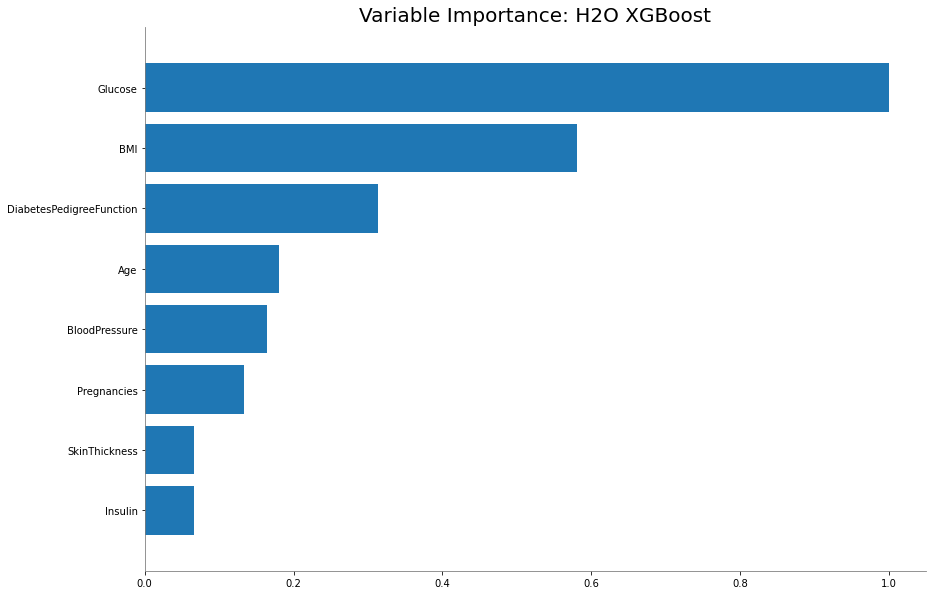

In [39]:
cv_xgb.varimp_plot()

**AutoML : Automatic Machine Learning:**

From the [H2O AutoML page](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html),

In [40]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
20:03:54.196: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


automl leaderboard:

In [41]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201107_200354,0.838498,0.471209,0.720251,0.225168,0.389759,0.151912
DRF_1_AutoML_20201107_200354,0.837813,0.673743,0.750599,0.225158,0.390594,0.152563
StackedEnsemble_AllModels_AutoML_20201107_200354,0.836755,0.473849,0.717937,0.233197,0.391309,0.153122
GLM_1_AutoML_20201107_200354,0.831638,0.488798,0.716653,0.238204,0.395915,0.156749
GBM_2_AutoML_20201107_200354,0.823921,0.492342,0.730483,0.240198,0.397899,0.158323
GBM_1_AutoML_20201107_200354,0.823186,0.499362,0.730256,0.23354,0.398824,0.15906
GBM_3_AutoML_20201107_200354,0.822944,0.491874,0.745621,0.245578,0.396877,0.157511
XGBoost_2_AutoML_20201107_200354,0.822722,0.490048,0.729844,0.237186,0.402005,0.161608
GBM_4_AutoML_20201107_200354,0.82235,0.492086,0.726875,0.241578,0.398974,0.159181
GBM_5_AutoML_20201107_200354,0.817947,0.496638,0.68625,0.239211,0.403748,0.163012


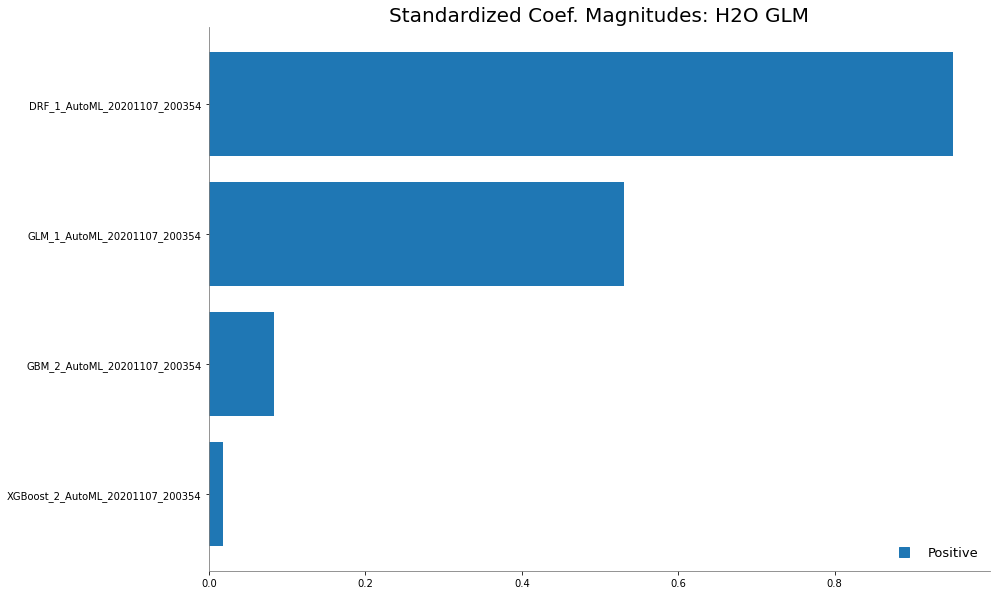

In [42]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()